# 소셜네트워크 분석 실습
## 201723371 강지애
### 1) 방향성 네트워크 그래프

In [10]:
import networkx as nx
import pandas as pd
feat = pd.read_csv('C:/Users/Jiae/Documents/featuring.csv') # csv 파일 불러오기
    
import matplotlib.font_manager as fm
from matplotlib import rc # 한글 깨짐 현상을 위한 폰트 불러오기

font_name = fm.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()

rc('font', family=font_name)
    
G = nx.from_pandas_edgelist(feat, source='from', target='to', create_using=nx.DiGraph)
print(G.edges()) # 불러온 csv파일을 nx.from_pandas_edgelist 을 통하여 엣지리스트 생성

[('아이유', 'G-DRAGON'), ('아이유', '오혁'), ('에픽하이', '아이유'), ('에픽하이', '오혁'), ('에픽하이', 'MINO'), ('에픽하이', '사이먼 도미닉'), ('에픽하이', '더콰이엇'), ('에픽하이', '수현'), ('HIGH4', '아이유'), ('MINO', '사이먼 도미닉'), ('MINO', '더콰이엇'), ('사이먼 도미닉', '더콰이엇')]


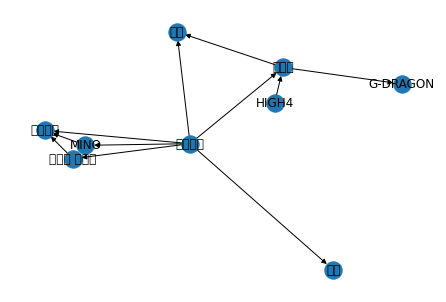

In [11]:
nx.draw(G, with_labels = True, font_weigth = "bold") # nx.draw 함수를 통하여 그래프 그렸지만 한글 깨짐 현상 발생

In [12]:
feat2 = pd.read_csv('C:/Users/Jiae/Documents/featuring_2.csv') # 영어로 노드 이름 변경 뒤 csv 파일 다시 불러오기

In [7]:
feat2

,from,to
0,IU,G-DRAGON
1,EPIK-HIGH,IU
2,EPIK-HIGH,OH-HYUK
3,IU,OH-HYUK
4,HIGH4,IU
5,EPIK-HIGH,MINO
6,EPIK-HIGH,SIMON-DOMINIC
7,EPIK-HIGH,The Quiett
8,EPIK-HIGH,SU HYUN
9,MINO,SIMON-DOMINIC


In [6]:
G2 = nx.from_pandas_edgelist(feat2, source='from', target='to', create_using=nx.DiGraph)
print(G2.edges()) # 영어로 된 featuring2 csv파일로 엣지리스트 재생성

[('IU', 'G-DRAGON'), ('IU', 'OH-HYUK'), ('EPIK-HIGH', 'IU'), ('EPIK-HIGH', 'OH-HYUK'), ('EPIK-HIGH', 'MINO'), ('EPIK-HIGH', 'SIMON-DOMINIC'), ('EPIK-HIGH', 'The Quiett'), ('EPIK-HIGH', 'SU HYUN'), ('HIGH4', 'IU'), ('MINO', 'SIMON-DOMINIC'), ('MINO', 'The Quiett'), ('SIMON-DOMINIC', 'The Quiett')]


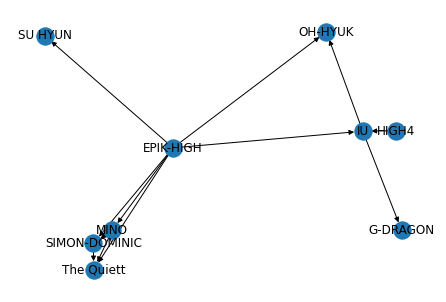

In [7]:
nx.draw(G2, with_labels = True, font_weigth = "bold") #nx.draw 이용하여 방향성 네트워크 그래프 그리기

 - 아이유와 피쳐링한 가수들로 그래프를 그렸지만, 에픽하이가 중심에 있는 노드인것으로 확인됨


### 2) BART(Bay Area Rapid Transit)의 관계도 
 - 샌프란시스코와 샌프란시스코 베이 지역 중 East Bay 지역을 연결하는 교통수단인 BART에 대해 관계망을 분석해보았습니다.
 - 6개의 루트와 46개의 역으로 이루어져 있고, 평일에 42만명 이상의 사람이 이용하는 교통수단이므로 자료량이 방대해 그 중 2017년 2월분을 추려서 분석해보겠습니다.

In [9]:
import os
import pandas as pd
import numpy as np
import networkx as nx

In [10]:
!pip install matplotlib

In [62]:
import matplotlib.pyplot as plt #matplotlib.pyplot 설치
import os
os.environ['PROJ_LIB'] = r'C:/Users/Jiae/anaconda3/pkgs/proj4-5.2.0-hfa6e2cd_1001/Library/share'
Bart = pd.read_csv('C:/Users/Jiae/Documents/bart_ridership_2017.csv') # bart csv 파일 불러오기


In [63]:
Bart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239496 entries, 0 to 239495
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Origin       239496 non-null  object
 1   Destination  239496 non-null  object
 2   Throughput   239496 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 5.5+ MB


In [41]:
Bartgraph = nx.from_pandas_edgelist(Bart, source = 'Origin', target = 'Destination', edge_attr = 'Throughput',create_using = nx.DiGraph())

In [57]:
print(nx.info(Bartgraph)) # Bartgraph 변수의 정보 출력

Name: 
Type: DiGraph
Number of nodes: 45
Number of edges: 2025
Average in degree:  45.0000
Average out degree:  45.0000


 - node의 수 45개, edge의 수 2025개로 표시됨

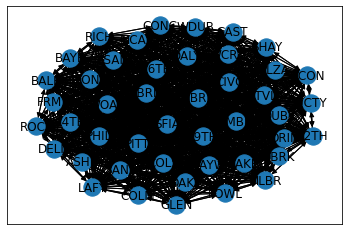

In [47]:
nx.draw_networkx(Bartgraph) # networkx 함수로 Bartgraph 출력

(-1.1823114574907394,
 1.1492799771610696,
 -1.1851051577524943,
 1.2076344267547618)

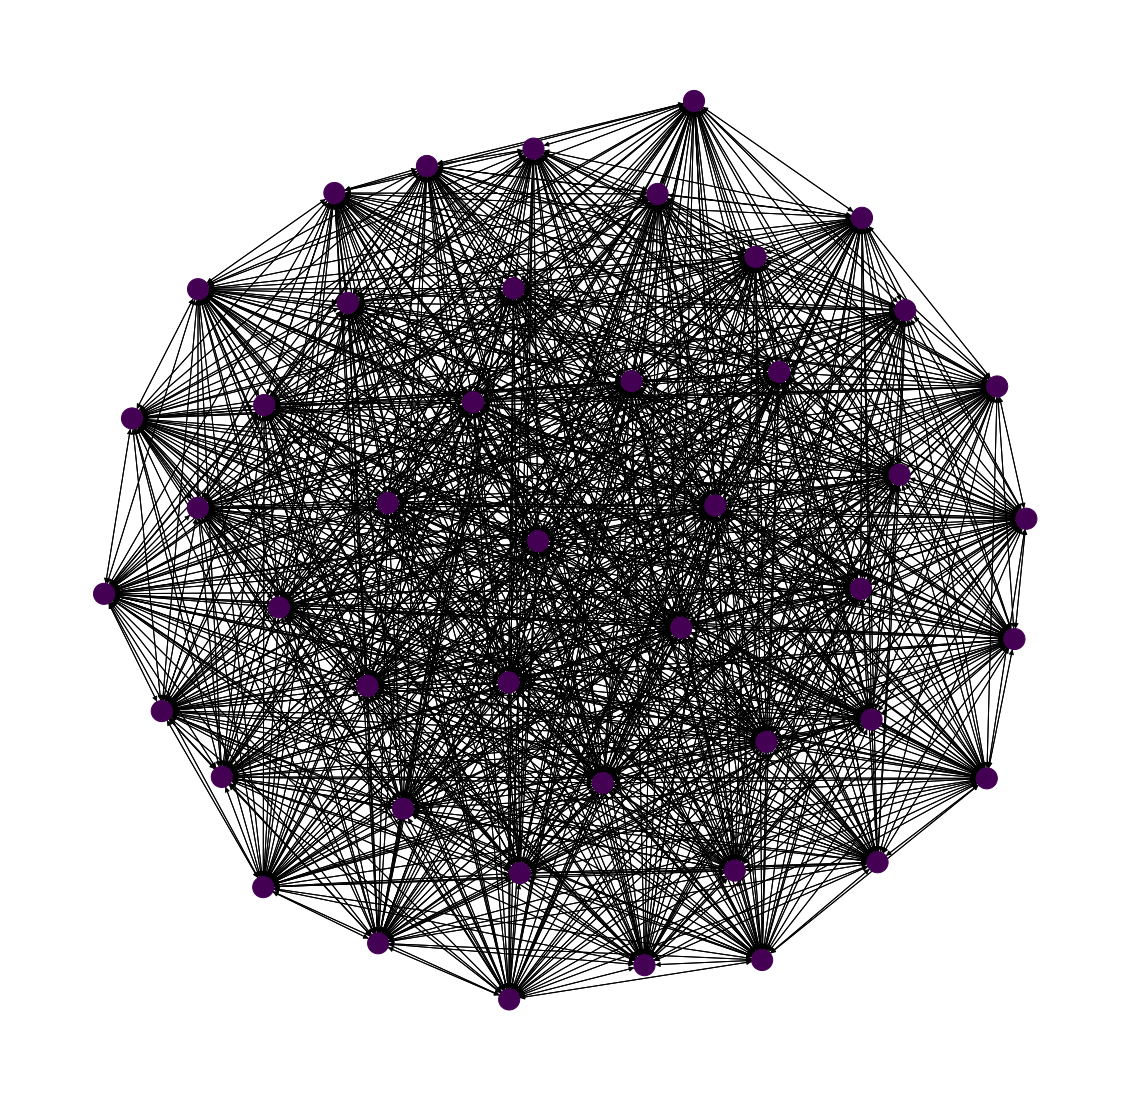

In [71]:
pos = nx.spring_layout(Bartgraph)
betCent = nx.betweenness_centrality(Bartgraph, normalized=True, endpoints=True)
node_color = [200000.0 * Bartgraph.degree(v) for v in Bartgraph]
node_size =  [v * 10000 for v in betCent.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(Bartgraph, pos=pos, with_labels=False,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off') # 중심성으로 연결망 그리기 -> 모두 연관성 있는것으로 표시됨

### 3) facebook 친구 목록의 연결망 찾기
 - Stanford University 에서 다운 받은 'facebook_combined.txt' 파일로 datacamp에 나와 있는 실습 예제를 따라해 보았습니다.

In [76]:
#csv 파일 불러오기
G_fb = nx.read_edgelist("C:/Users/Jiae/Documents/facebook_combined.txt",create_using = nx.Graph(), nodetype=int) 

In [81]:
print(nx.info(G_fb)) # G_fb의 형태 보기


Name: 
Type: Graph
Number of nodes: 4039
Number of edges: 88234
Average degree:  43.6910


(-0.9074655085802078,
 1.0908316284418107,
 -0.9714394837617875,
 0.8251770168542862)

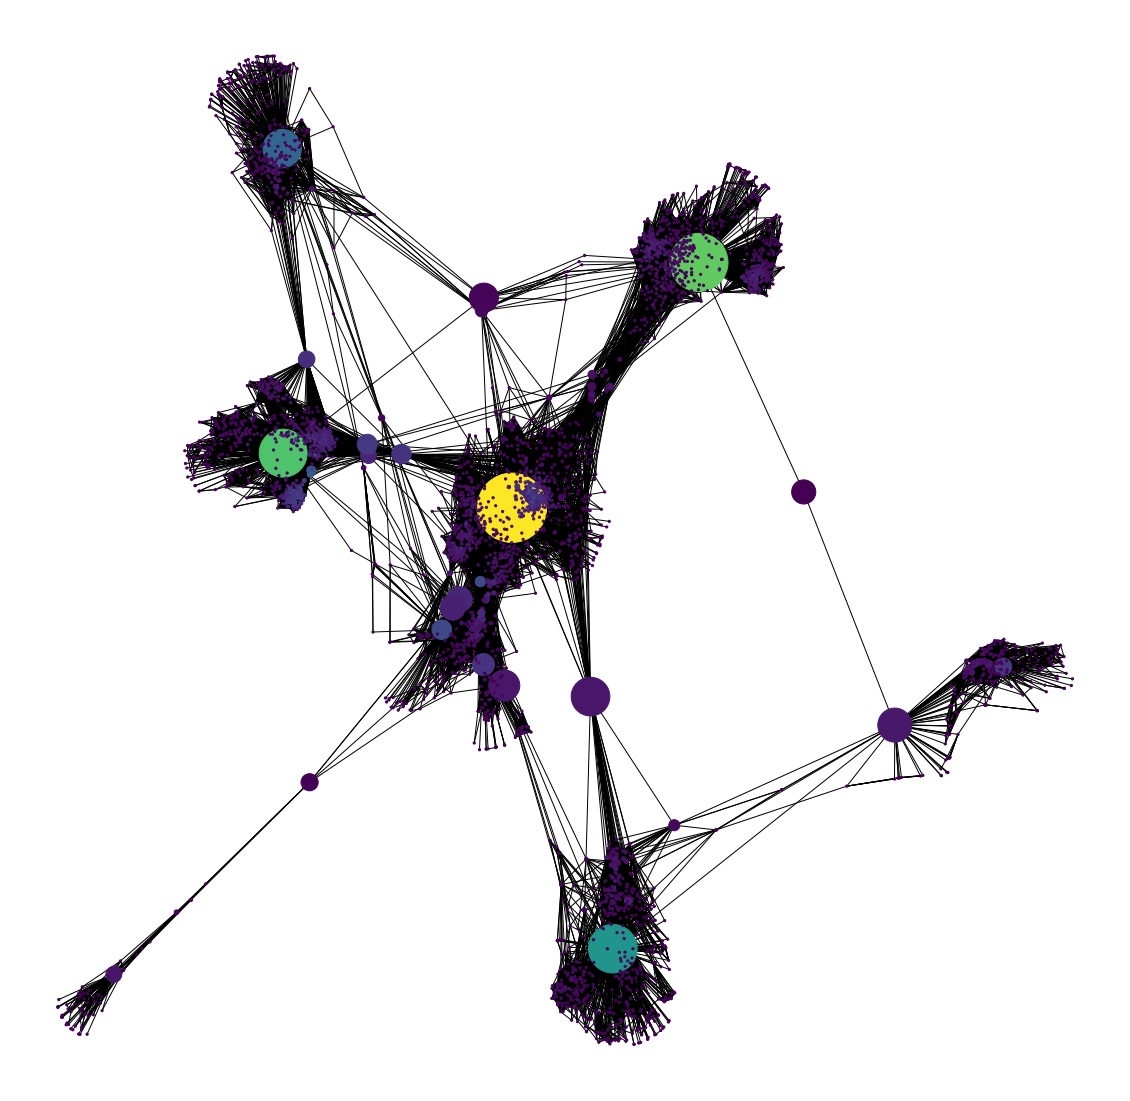

In [82]:
pos = nx.spring_layout(G_fb)
betCent = nx.betweenness_centrality(G_fb, normalized=True, endpoints=True)
node_color = [20000.0 * G_fb.degree(v) for v in G_fb]
node_size =  [v * 10000 for v in betCent.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(G_fb, pos=pos, with_labels=False,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off')

In [83]:
sorted(betCent, key=betCent.get, reverse=True)[:5] #중심성이 가장 높은 5개 노드의 순서대로 볼 수 있습니다.

[107, 1684, 3437, 1912, 1085]

 - 가장 연결성이 높은 노드가 다른 노드 사이에서 최단 경로에 놓여 있는것은 당연합니다.